# Import all neccessary library


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [5]:
!unzip netflix_stocks_price.zip

Archive:  netflix_stocks_price.zip
  inflating: NFLX.csv                


# Dataset for Netlix stocks price prediction
The Dataset contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022

In [6]:
url = 'NFLX.csv'

#stock_data = df
df = pd.read_csv(url)
df

Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1     12595800  
2      8981500  
3      9306700  
4     16906900  
...        ...  
1004  20047500  
1005  22542300  
1006  14346000  
1007   9905200  
1008   7782400  

[1009 rows x 7 columns]

In [7]:
import pandas as pd

# Konversi kolom 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # Set kolom 'Date' sebagai indeks waktu
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-02-05  11896100  
2018-02-06  12595800  
2018-02-07   8981500  
2018-02-08   9306700  
2018-02-09  16906900  


In [8]:
print(df.isnull().sum())  # Cek missing values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
import matplotlib.pyplot as plt

df['Close'].plot(figsize=(10, 5), title='Netflix Stock Price', ylabel='Price')
plt.show()

## Terdapat 6 kolom

dimana terdiri dari
- 1 kolom numerik dengan tipe data int64
- 5 kolom numerik dengan tipe data float64

Sebenarnya ada kolom date yang telah diubah menjadi datetime


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


# Menambahkan fitur tambahan
Tujuan: Membantu model untuk lebih memahami data


a. Lag features (Fitur Historis)

menambahkan harga saham dari beberapa hari sebelumnya

In [11]:
df['Close_Lag1'] = df['Close'].shift(1)  # Harga penutupan 1 hari sebelumnya
df['Close_Lag7'] = df['Close'].shift(7)  # Harga penutupan 7 hari sebelumnya

b. Moving Averages

Tambahkan rata-rata bergerak untuk menangkap tren jangka pendek:

In [12]:
df['MA7'] = df['Close'].rolling(window=7).mean()  # Rata-rata 7 hari
df['MA30'] = df['Close'].rolling(window=30).mean()  # Rata-rata 30 hari

c. Fitur Tanggal

Ekstrak informasi dari tanggal, seperti hari dalam seminggu atau bulan:

In [13]:
# 0 = Senin, 6 = Minggu

df['Day'] = df.index.day
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday

d. Volatilitas (Spread Harian)

Tambahkan fitur volatilitas:

In [14]:
df['Volatility'] = df['High'] - df['Low']

Membuat data yang NAN

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 980 entries, 2018-03-19 to 2022-02-04
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        980 non-null    float64
 1   High        980 non-null    float64
 2   Low         980 non-null    float64
 3   Close       980 non-null    float64
 4   Adj Close   980 non-null    float64
 5   Volume      980 non-null    int64  
 6   Close_Lag1  980 non-null    float64
 7   Close_Lag7  980 non-null    float64
 8   MA7         980 non-null    float64
 9   MA30        980 non-null    float64
 10  Day         980 non-null    int32  
 11  Month       980 non-null    int32  
 12  Weekday     980 non-null    int32  
 13  Volatility  980 non-null    float64
dtypes: float64(10), int32(3), int64(1)
memory usage: 103.4 KB


# Univariate Analysis

mengecek numerical features

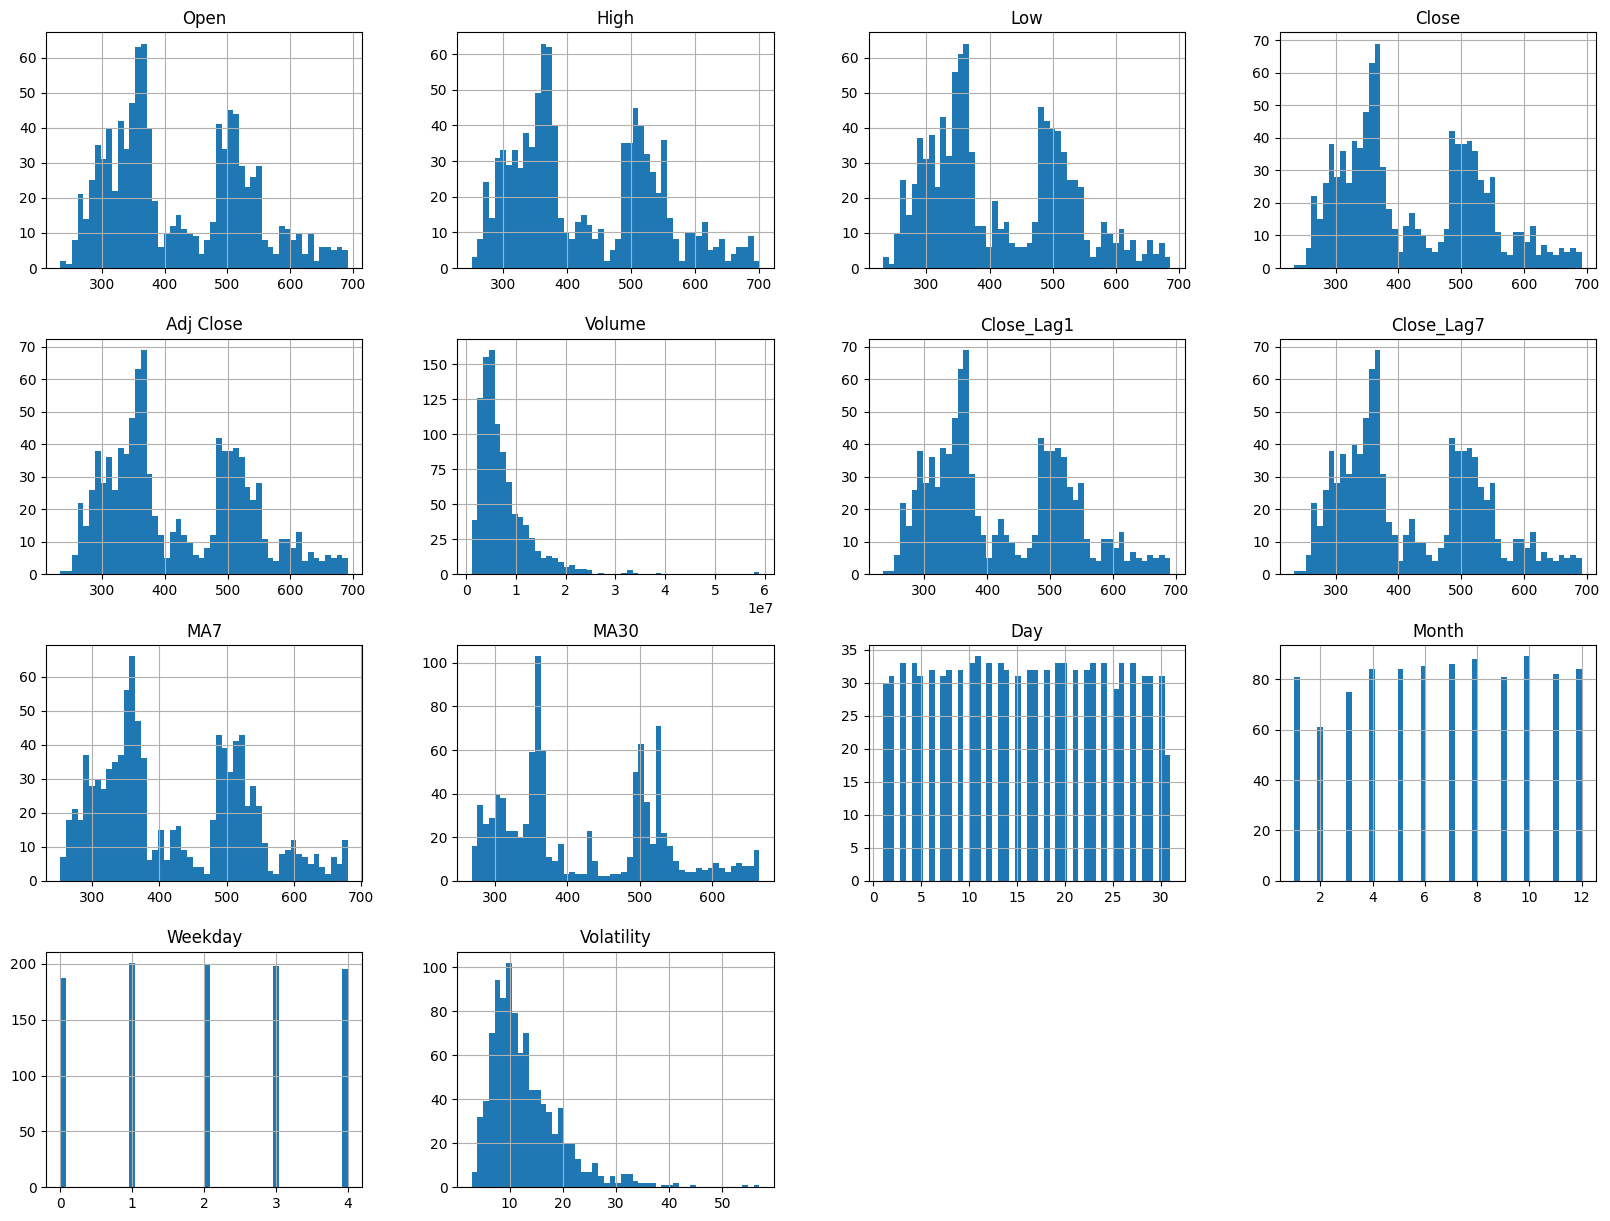

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

- Dilihat dari histogram diatas, fitur utama (Open, High, Low, Close, Adj. Close) memiliki sebagian besar nilai pada range 300-600 yang menandakan bahwa harga saham netflix cenderung berada pada rentang nilai tersebut.

- Distribusi model tidak normal atau miring ke kanan (right skewed)

## Karena semua fitur pada data tidak memiliki categorical features maka tidak dilakukan Encoding fitur kategori dan PCA

# Train-Test Split atau Pembagian dataset

dataset dibagi menjadi 80% Train dataset dan 20% Validation dataset

In [18]:
from sklearn.model_selection import train_test_split

# Fitur dan Target
X = df[['Close_Lag1', 'Close_Lag7', 'MA7', 'MA30', 'Volatility', 'Volume']]  # Fitur
y = df['Close']  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 980
Total # of sample in train dataset: 784
Total # of sample in test dataset: 196


# Modelling

Menggunakan 3 Model dengan algoritma:
1. K-Nearest Neighbor (KNN)
2. Random Forest
3. Boosting Algorithm.

## K-Nearest Neightbor (KNN)

In [20]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest

In [22]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Boosting Algorithm

In [23]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model

In [30]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

## Scaling pada data train

In [33]:
# Fitur numerik yang ingin diskalakan
numerical_features = ['Close_Lag1', 'Close_Lag7', 'MA7', 'MA30', 'Volatility', 'Volume']

# Scaling pada X_train
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

<ipython-input-33-d8b1a35b14a9>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 3.32129652e-01 -4.21277076e-01 -5.60722351e-01 -2.45092993e-02
  2.56411634e-01  7.27307600e-01  7.42688720e-01  2.06517774e+00
  2.09823853e+00  9.98823639e-01  8.62653796e-01  9.04621461e-01
  4.71958018e-01  6.23202508e-01  3.18414980e-01  4.72973210e-01
  1.28070230e+00  3.94228770e-01  7.38474715e-01  2.32089126e+00
  4.91798288e+00  5.80353734e-01  4.74161136e-02  1.85309868e-01
  1.48782102e-01  1.09218302e+00  1.28880468e+00  2.05996804e-01
 -2.13928849e-01 -4.02716297e-01 -4.12714983e-01 -4.77744751e-01
 -3.93713649e-01  3.49468301e-03 -2.05615765e-01 -6.61896793e-01
 -4.89946212e-01 -5.53366996e-01 -6.89862466e-01 -7.85616165e-01
 -6.59904718e-01 -8.65701425e-01 -6.23587652e-01 -8.83706722e-01
 -2.93822563e-01 -4.26544583e-01  3.55862165e-01  1.25794667e+00
 -7.16103886e-02  2.92422227e-01 -4.79966681e-01 -2.43177878e-01
 -

## Scaling pada data Test

In [34]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-34-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.58679172 -0.72367028 -0.78521392 -0.73587175 -0.96957666 -0.84424831
 -0.96892541 -0.58606385 -0.72600714 -0.77954417 -1.04943207 -1.0168693
 -1.05083035 -1.11877161 -0.92734083 -0.85621991 -0.93251257 -1.10687662
 -1.05192216 -1.09678217 -0.94574838 -1.01154433 -1.09346843 -1.13438259
 -0.82438502 -0.96361959 -1.03422334 -1.11427029 -0.98382766 -0.72947412
 -0.97061101 -0.72616038 -0.97442277 -0.89223051 -0.95637916 -0.57342183
 -0.55815564 -0.45625332 -0.81339029 -0.92517637 -0.55397994 -1.02880259
 -1.1256481  -1.03776693 -1.03163747 -1.19060125 -1.03744131 -1.04751661
 -0.94283688 -1.03703906 -1.22791436 -1.04194263 -0.67649258 -0.47452678
 -0.90968032 -0.82469149 -0.24151143  0.71169662 -0.73997082 -0.83719942
 -1.13716    -1.04052519 -1.11110978 -1.23647645 -1.08345058 -1.16740507
 -1.0749268  -1.17836148 -1.07927489 -1.20134

Memuncul evaluasi pada masing-masing model algoritma

In [35]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

train       test
KNN       22.161505   7.406812
RF        25.902368  99.068728
Boosting  19.427841  83.622782

# Plot dengan bar chart

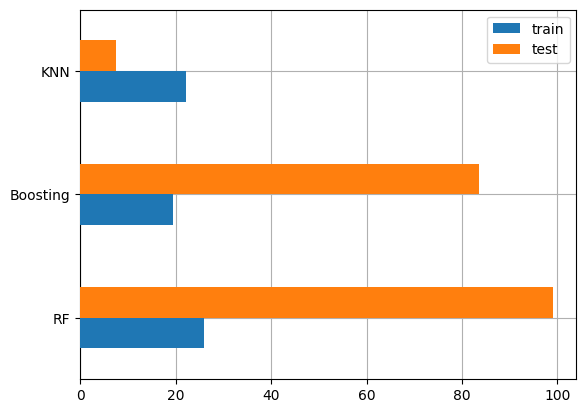

In [36]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan grafik batang diatas, model KNN memberikan error yang paling kecil yaitu dibawah 20. Sedangkan model Random Forest memberikan angka error paling tinggi yang hampir menyentuh 100

# Pengujian

Untuk mengujinya, gunakan beberapa harga dari data test

In [39]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'Nilai sebenarnya':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting
Date                                                            
2021-04-29   509.0         510.4        252.5              278.8

Dari data diatas, Terbukti bahwa algoritma KNN dengan hasil prediksi 510.4 memiliki tingkat akurasi yang tinggi mendekati nilai true yaitu 509.0

## Melakukan evaluasi error dengan MAE

In [41]:
from sklearn.metrics import mean_absolute_error

for name, model in model_dict.items():
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print(f"MAE for {name}: {mae:.2f}")

MAE for KNN: 66.41
MAE for RF: 306.66
MAE for Boosting: 280.35
